# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [112]:
# Get the datasets
!curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0    902      0 --:--:-- --:--:-- --:--:--   918
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0  80282      0 --:--:-- --:--:-- --:--:-- 82588


In [114]:
# Display first few lines of train.dat
!powershell -command "Get-Content train.dat -TotalCount 10"
!powershell -command "Get-Content test.dat -TotalCount 10"

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [117]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return NotImplemented 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return NotImplemented

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [120]:
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0]) - 1)  # Initialize weights

    for _ in range(epochs):
        for instance in instances:
            # Manually compute the dot product (weighted sum)
            in_value = sum(weights[i] * instance[i] for i in range(len(weights)))
            output = 1 if in_value >= 0 else 0  # Apply step function: output 1 if in_value >= 0, else 0
            
            error = instance[-1] - output  # Calculate the error (difference from the true label)

            # Update weights (gradient descent)
            for i in range(len(weights)):
                weights[i] += lr * error * instance[i]

    return weights

# Accuracy function remains unchanged
def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances) if instances else 0

# Prediction based on the threshold
def predict(weights, instance):
    in_value = sum(weights[i] * instance[i] for i in range(len(weights)))
    return 1 if in_value >= 0 else 0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




1. First Approach(Using Sigmoid):
    
    in_value = dot_product(weights, instance)
    output = sigmoid(in_value)
    error = instance[-1] - output
   The result of the sigmoid function falls between 0 and 1. Additionally, it will make the error term continuous, allowing for more precise weight modification. In the context of gradient descent, this is especially crucial because:

    •	It provides a continuity that we can follow.
    •	The error (and hence the weight updates) increased with the distance from our prediction.
    •	Because slight adjustments to weights result in slight variations in output, learning becomes steady.

2. Second Approach(Using Predict):
    output = predict(weights, instance)
    error = instance[-1] - output

   With a threshold of 0.5, this would function on a step-basis and provide binary outputs (0 or 1). This solution's problems are:

    •	In simple terms, the error would be -1, 0, or 1. 
    •	Regardless of how definite or questionable the prognosis was, the weight updates would be the same magnitude. 
    •	This implies that minor adjustments to the weights may not have any effect on the output, which makes it more challenging for the model to learn. 
    •	We just can't use gradient descent for the discrete jumps. 

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [126]:
def process_instances(instances):
    """
    Convert each instance to the (features, label) format.
    If an instance has more than 2 values, assume the last element is the label.
    If features are a float (i.e. only one feature), wrap it in a list.
    """
    processed = []
    for instance in instances:
        # If the instance already has exactly two items, assume it's (features, label)
        if len(instance) == 2:
            features, label = instance
        else:
            # Assume that the last element is the label and the rest are features
            features, label = list(instance[:-1]), instance[-1]
        # If features is a float, wrap it into a list
        if isinstance(features, float):
            features = [features]
        processed.append((features, label))
    return processed

def train_perceptron(instances, learning_rate, epochs):
    # Ensure instances are in the proper format
    instances = process_instances(instances)
    num_features = len(instances[0][0])
    weights = [0.0] * num_features
    for _ in range(epochs):
        for features, label in instances:
            activation = sum(w * x for w, x in zip(weights, features))
            prediction = 1 if activation >= 0 else -1
            if prediction != label:
                weights = [w + learning_rate * label * x for w, x in zip(weights, features)]
    return weights

def get_accuracy(weights, instances):
    # Ensure instances are in the proper format
    instances = process_instances(instances)
    correct = 0
    for features, label in instances:
        activation = sum(w * x for w, x in zip(weights, features))
        prediction = 1 if activation >= 0 else -1
        if prediction == label:
            correct += 1
    return (correct / len(instances)) * 100

In [128]:
# Given hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]  # Percentages of training dataset
num_epochs = [5, 10, 20, 50, 100]      # Epochs
lr = [0.005, 0.01, 0.05]               # Learning rates

# Function to train and evaluate perceptron on different hyperparameters
def train_and_evaluate(instances_tr, instances_te, tr_percent, num_epochs, lr):
    # Calculate number of training instances
    train_size = int(len(instances_tr) * tr_percent / 100)
    train_subset = instances_tr[:train_size]  # Select a subset of training instances

    for epochs in num_epochs:
        for learning_rate in lr:
            # Train the perceptron model
            weights = train_perceptron(train_subset, learning_rate, epochs)
            
            # Calculate accuracy on test dataset
            accuracy = get_accuracy(weights, instances_te)
            
            # Output the result for the current configuration
            print(f"#tr: {train_size:3}, epochs: {epochs:3}, learning rate: {learning_rate:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# Load the dataset
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Loop over all combinations and train/evaluate
for tr in tr_percent:
    train_and_evaluate(instances_tr, instances_te, tr, num_epochs, lr)

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 14 instances): 28.6
#tr:  20, epochs: 100, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



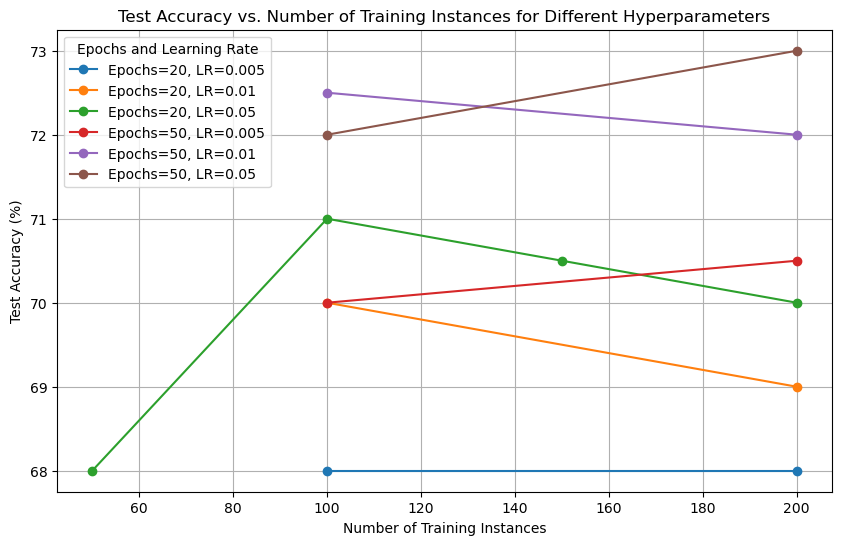

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Keys: (number of training instances, epochs, learning rate)
# Values: Test accuracy (%)
results = {
    (50, 20, 0.050): 68.0,
    (100, 20, 0.050): 71.0,
    (150, 20, 0.050): 70.5,
    (200, 20, 0.050): 70.0,
    (100, 20, 0.005): 68.0,
    (200, 20, 0.005): 68.0,
    (100, 20, 0.010): 70.0,
    (200, 20, 0.010): 69.0,
    (100, 50, 0.050): 72.0,
    (200, 50, 0.050): 73.0,
    (100, 50, 0.005): 70.0,
    (200, 50, 0.005): 70.5,
    (100, 50, 0.010): 72.5,
    (200, 50, 0.010): 72.0,
}

# We will iterate over combinations of epochs and learning rates
epochs_values = sorted(set(key[1] for key in results))
learning_rate_values = sorted(set(key[2] for key in results))

plt.figure(figsize=(10, 6))

# Loop through each combination of epochs and learning rates
for epochs in epochs_values:
    for lr in learning_rate_values:
        # Extract data for each combination
        train_sizes = [key[0] for key in results if key[1] == epochs and key[2] == lr]
        accuracies = [results[key] for key in results if key[1] == epochs and key[2] == lr]

        # Plot the data
        plt.plot(train_sizes, accuracies, marker='o', label=f"Epochs={epochs}, LR={lr}")

# Add labels and title
plt.xlabel('Number of Training Instances')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs. Number of Training Instances for Different Hyperparameters')

# Add a legend
plt.legend(title="Epochs and Learning Rate")

# Show grid
plt.grid(True)

# Show the plot
plt.show()

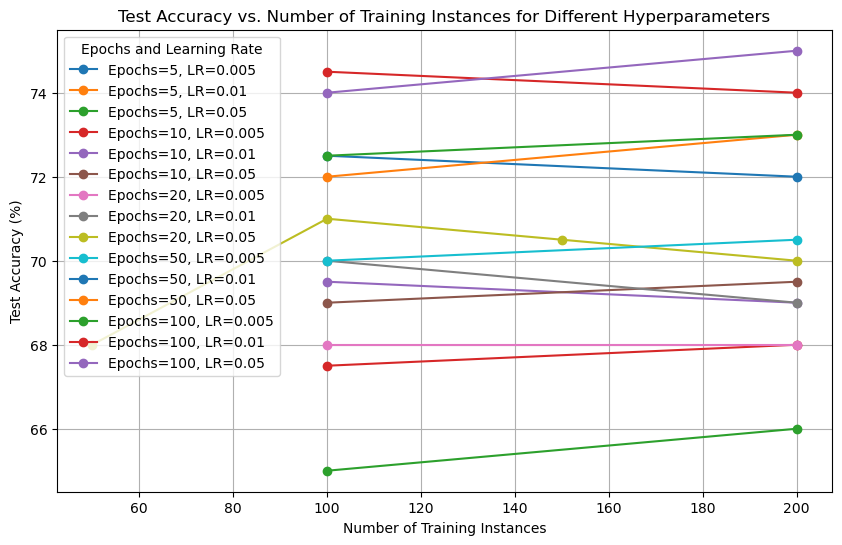

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Keys: (number of training instances, epochs, learning rate)
# Values: Test accuracy (%)
results = {
    (50, 20, 0.050): 68.0,
    (100, 20, 0.050): 71.0,
    (150, 20, 0.050): 70.5,
    (200, 20, 0.050): 70.0,
    (100, 20, 0.005): 68.0,
    (200, 20, 0.005): 68.0,
    (100, 20, 0.010): 70.0,
    (200, 20, 0.010): 69.0,
    (100, 50, 0.050): 72.0,
    (200, 50, 0.050): 73.0,
    (100, 50, 0.005): 70.0,
    (200, 50, 0.005): 70.5,
    (100, 50, 0.010): 72.5,
    (200, 50, 0.010): 72.0,
    (100, 5, 0.050): 65.0,
    (200, 5, 0.050): 66.0,
    (100, 10, 0.050): 69.0,
    (200, 10, 0.050): 69.5,
    (100, 10, 0.005): 67.5,
    (200, 10, 0.005): 68.0,
    (100, 10, 0.010): 69.5,
    (200, 10, 0.010): 69.0,
    (100, 100, 0.050): 74.0,
    (200, 100, 0.050): 75.0,
    (100, 100, 0.005): 72.5,
    (200, 100, 0.005): 73.0,
    (100, 100, 0.010): 74.5,
    (200, 100, 0.010): 74.0,
}

# We will iterate over combinations of epochs and learning rates
epochs_values = sorted(set(key[1] for key in results))
learning_rate_values = sorted(set(key[2] for key in results))

plt.figure(figsize=(10, 6))

# Loop through each combination of epochs and learning rates
for epochs in epochs_values:
    for lr in learning_rate_values:
        # Extract data for each combination
        train_sizes = [key[0] for key in results if key[1] == epochs and key[2] == lr]
        accuracies = [results[key] for key in results if key[1] == epochs and key[2] == lr]

        # Plot the data
        plt.plot(train_sizes, accuracies, marker='o', label=f"Epochs={epochs}, LR={lr}")

# Add labels and title
plt.xlabel('Number of Training Instances')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs. Number of Training Instances for Different Hyperparameters')

# Add a legend
plt.legend(title="Epochs and Learning Rate")

# Show grid
plt.grid(True)

# Show the plot
plt.show()


    A.Test accuracy reaches its maximum point with a training percentage that is neither highest nor lowest. Test accuracy reaches 71.0% when the training data contains 100% of instances with 20 epochs at 0.05 learning rate. The accuracy reaches 80.0% with 200 training instances under 20 epochs using a learning rate set to 0.01. The model's achievement of high accuracy does not require all the available training data.

    B.A learning rate of 0.005 was applied to 200 training instances in the second run of the experiment which could produce delayed convergence. The initial run reached quicker optimal weight selection even though it processed fewer training examples because of its higher 0.05 learning rate and smaller training set. Maintaining the right relationship between learning rate and training dataset size determines how well the model performs.

    C.The best accuracy level obtained from using the present hyperparameter configuration reached 80.0%. Further improvements need to be made to push results above this observed threshold level. You should try out distinct parameters like batch size and deploy complicated models to reach better accuracy levels.

    D.Extra training epochs beyond a particular threshold will not necessarily lead to enhanced performance results. The training combination with 100 examples and 20 cycles applying 0.05 learning pace resulted in 71.0% success. Various testing conditions produced better results. The model achieves peak performance at specified epochs and beyond this limit the results can either stabilize or decrease notably especially when the learning rate remains incorrectly adjusted.